In [153]:
import sqlite3
import pandas as pd
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

con = sqlite3.connect("../input/d/mekhdigakhramanian/data-sqlite/data.sqlite")

cur = con.cursor()

query = """SELECT *
FROM wetransfer_senior_data_analyst_assignment_2022
WHERE started_at BETWEEN date('2020-01-01') AND date('2020-12-31')
LIMIT 10;
"""

cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

con.close()

('ea2bce93f423433c1d10be35ecc0c764', 'pro', 'month', '2020-01-01', '2020-02-01 00:00:00.000000')
('7ee093548ac8a27875061b9484275e5a', 'pro', 'month', '2020-01-02', '2020-02-09 00:00:00.000000')
('1b229df17fe41c8f375315e6cedb47c3', 'pro', 'month', '2020-01-02', '2020-05-02 00:00:00.000000')
('0591c8a764f37ec875226dbf6d49c4d9', 'pro', 'month', '2020-01-03', '2020-06-03 00:00:00.000000')
('32ec67ed9cf653b339b208976d16d64d', 'pro', 'month', '2020-01-07', '2020-04-07 00:00:00.000000')
('42437f5676ad1d03027e35fe61c5d44c', 'pro', 'month', '2020-01-08', '2020-02-08 00:00:00.000000')
('88c35f9fef0dabf52f4e5729b6164bba', 'pro', 'month', '2020-01-09', '2022-08-09 00:00:00.000000')
('02462f3b530c0f41ff89951bbd30110f', 'pro', 'month', '2020-01-09', '2020-03-16 00:00:00.000000')
('a0bd787efe429968506fbcf15c174b16', 'pro', 'month', '2020-01-11', '2020-04-11 00:00:00.000000')
('784da7bb5637dbf5f1619aab4789d0d0', 'pro', 'month', '2020-01-12', '2020-03-19 00:00:00.000000')


In [154]:
con = sqlite3.connect("../input/d/mekhdigakhramanian/data-sqlite/data.sqlite")

cur = con.cursor()

query = """SELECT strftime('%m', started_at), COUNT(user_id)
FROM wetransfer_senior_data_analyst_assignment_2022
WHERE started_at BETWEEN date('2020-01-01') AND date('2020-12-31')
GROUP BY
strftime('%m', started_at);
"""

cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

con.close()

('01', 3513)
('02', 3704)
('03', 4899)
('04', 6040)
('05', 6035)
('06', 5445)
('07', 5661)
('08', 5553)
('09', 5869)
('10', 5921)
('11', 5630)
('12', 5625)


In [155]:
import sqlite3
con = sqlite3.connect("../input/d/mekhdigakhramanian/data-sqlite/data.sqlite")

cur = con.cursor()

query = """SELECT user_id, COUNT(user_id)
FROM wetransfer_senior_data_analyst_assignment_2022
WHERE started_at BETWEEN date('2020-01-01') AND date('2020-12-31')
GROUP BY user_id
HAVING
COUNT(user_id) > 1;
"""

cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

con.close()

('0001a55b63eb85dfa06dac45fd0883b8', 2)
('000b6114722b74472b45539826bf3854', 2)
('002b5e42c06adfc81f417a60737931a8', 3)
('002d6f4c8a5b9db78f07a9640bac8ee1', 2)
('00394805b030c004cb3838f3a961c2f2', 2)
('00651cbd0723472812b1df970dcdf660', 3)
('007e7b35608b43a714421459b8d766a8', 3)
('007f23212fd99e4a4fc2c09ee269feca', 2)
('007f7cfb10eab0e5dc1818396b18f0ec', 3)
('0083787203713e5a2cb9a8bb7c59e2e8', 2)
('008c0b55b4a644ba7914aaaf82665f15', 2)
('008e00a585cc297a8daf7a5f2b717491', 3)
('00a0c53b25d3dd4800ab3c65e515c6e4', 2)
('00a344012763576f722c8fbabaa4d40c', 2)
('00ae80c4f333a83593cc2129e20adb72', 2)
('00c0e37db54ca8f0d6f34c1ffb5f85bd', 2)
('00d535a8313d1435f544e07eb3ed8b5d', 2)
('00d9a270925323dcf240dda6103e1dc4', 2)
('00df6598fb1d96eaa017747a9591e84f', 3)
('00e03f21f4a8bd4e756ef90e81599362', 2)
('00e107fcdd857fb93463c525472427a5', 2)
('00e77854e211b8fb75b5dcc4e35becc5', 2)
('00ed15faed8e674521026eb78e381631', 2)
('00f8e76afb2a7f982d20acb961c644e1', 2)
('00f9e321202c495163664a8964c54971', 2)


In [156]:
import sqlite3

con = sqlite3.connect("../input/d/mekhdigakhramanian/data-sqlite/data.sqlite")

cur = con.cursor()


query = """SELECT * FROM (
SELECT *
FROM wetransfer_senior_data_analyst_assignment_2022
WHERE started_at BETWEEN date('2020-01-01') AND date('2020-12-31')
) A
LEFT JOIN
(
SELECT DISTINCT *
FROM wetransfer_senior_data_analyst_assignment_2022
WHERE started_at BETWEEN date('2020-01-01') AND date('2020-12-31')
) B
ON 
A.started_at = B.started_at
WHERE B.started_at = NULL
;
"""

cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

con.close()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29636 entries, 0 to 29635
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        29636 non-null  object        
 1   plan           29636 non-null  object        
 2   billing_cycle  29636 non-null  object        
 3   started_at     29636 non-null  datetime64[ns]
 4   ended_at       29636 non-null  object        
 5   order_month    29636 non-null  period[M]     
dtypes: datetime64[ns](1), object(4), period[M](1)
memory usage: 1.4+ MB


In [158]:
import sqlite3

con = sqlite3.connect("../input/d/mekhdigakhramanian/data-sqlite/data.sqlite")

cur = con.cursor()


query = """SELECT *
FROM wetransfer_senior_data_analyst_assignment_2022
WHERE started_at BETWEEN date('2020-01-01') AND date('2020-12-31')
"""

cur.execute(query)
rows = cur.fetchall()

df = pd.DataFrame(rows, columns =["user_id", "plan", "billing_cycle", "started_at", "ended_at"])

con.close()

In [159]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y/%m/%d')

In [160]:
df['order_month'] = df['started_at'].dt.to_period('M')
print(df)

                                user_id plan billing_cycle started_at  \
0      ea2bce93f423433c1d10be35ecc0c764  pro         month 2020-01-01   
1      7ee093548ac8a27875061b9484275e5a  pro         month 2020-01-02   
2      1b229df17fe41c8f375315e6cedb47c3  pro         month 2020-01-02   
3      0591c8a764f37ec875226dbf6d49c4d9  pro         month 2020-01-03   
4      32ec67ed9cf653b339b208976d16d64d  pro         month 2020-01-07   
...                                 ...  ...           ...        ...   
63890  ad816e575c959d9accdf2f065b2120a8  pro         month 2020-12-28   
63891  49cf63fbc9ce52301d1699313243cc2a  pro         month 2020-12-29   
63892  0e91c931f4df7e545253ab20a629788d  pro         month 2020-12-29   
63893  2f4c3aa1b66e053f2ae1adcb92357cff  pro         month 2020-12-29   
63894  5c97aac7ed54639b194f9f1dd6d24cf8  pro         month 2020-12-31   

                         ended_at order_month  
0      2020-02-01 00:00:00.000000     2020-01  
1      2020-02-09 00:00:00.

In [161]:
df['cohort'] = df.groupby('user_id')['started_at'].transform('min').dt.to_period('M')

In [162]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('user_id', 'nunique')).reset_index(drop=False)

In [163]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [164]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2020-01,2020-01,3510,0
1,2020-01,2020-02,98,1
2,2020-01,2020-03,160,2
3,2020-01,2020-04,115,3
4,2020-01,2020-05,103,4


In [165]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')

In [166]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2020-01,3510.0,98.0,160.0,115.0,103.0,109.0,117.0,113.0,104.0,106.0,85.0,92.0
2020-02,3599.0,113.0,134.0,119.0,104.0,122.0,104.0,115.0,104.0,88.0,86.0,NaN
2020-03,4625.0,125.0,205.0,161.0,165.0,141.0,170.0,142.0,164.0,161.0,NaN,NaN
2020-04,5659.0,165.0,210.0,212.0,175.0,171.0,173.0,170.0,149.0,NaN,NaN,NaN
2020-05,5432.0,137.0,207.0,156.0,148.0,176.0,177.0,144.0,NaN,NaN,NaN,NaN
2020-06,4717.0,97.0,195.0,155.0,143.0,184.0,152.0,NaN,NaN,NaN,NaN,NaN
2020-07,4740.0,113.0,177.0,194.0,152.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,4555.0,106.0,184.0,168.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,4723.0,130.0,198.0,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
import sqlite3

con = sqlite3.connect("../input/d/mekhdigakhramanian/data-sqlite/data.sqlite")

cur = con.cursor()


query = """SELECT *
FROM wetransfer_senior_data_analyst_assignment_2022
WHERE started_at BETWEEN date('2020-01-01') AND date('2020-06-30')
"""

cur.execute(query)
rows = cur.fetchall()

df = pd.DataFrame(rows, columns =["user_id", "plan", "billing_cycle", "started_at", "ended_at"])

con.close()

In [168]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y/%m/%d')
df['order_month'] = df['started_at'].dt.to_period('M')
print(df)

                                user_id plan billing_cycle started_at  \
0      ea2bce93f423433c1d10be35ecc0c764  pro         month 2020-01-01   
1      7ee093548ac8a27875061b9484275e5a  pro         month 2020-01-02   
2      1b229df17fe41c8f375315e6cedb47c3  pro         month 2020-01-02   
3      0591c8a764f37ec875226dbf6d49c4d9  pro         month 2020-01-03   
4      32ec67ed9cf653b339b208976d16d64d  pro         month 2020-01-07   
...                                 ...  ...           ...        ...   
29631  733381931ae08b5cc95de096e8db2d86  pro         month 2020-06-27   
29632  71f775a828f1cd838197b5682113a8ad  pro         month 2020-06-29   
29633  59e398a48a673daca9dedeba8b7b3635  pro         month 2020-06-30   
29634  e87f939f4274b488eff0f43f2dabcf67  pro         month 2020-06-30   
29635  1ab22257c6e505321bbfba3913e16ebf  pro         month 2020-06-30   

                         ended_at order_month  
0      2020-02-01 00:00:00.000000     2020-01  
1      2020-02-09 00:00:00.

In [169]:
print(df_cohort)
print(df_cohort['cohort'][0:13])

print(df_cohort['order_month'][0:13])

     cohort order_month  n_customers  period_number
0   2020-01     2020-01         3510              0
1   2020-01     2020-02           98              1
2   2020-01     2020-03          160              2
3   2020-01     2020-04          115              3
4   2020-01     2020-05          103              4
..      ...         ...          ...            ...
73  2020-10     2020-11          124              1
74  2020-10     2020-12          202              2
75  2020-11     2020-11         4119              0
76  2020-11     2020-12           93              1
77  2020-12     2020-12         4075              0

[78 rows x 4 columns]
0     2020-01
1     2020-01
2     2020-01
3     2020-01
4     2020-01
5     2020-01
6     2020-01
7     2020-01
8     2020-01
9     2020-01
10    2020-01
11    2020-01
12    2020-02
Name: cohort, dtype: period[M]
0     2020-01
1     2020-02
2     2020-03
3     2020-04
4     2020-05
5     2020-06
6     2020-07
7     2020-08
8     2020-09
9     2020-10


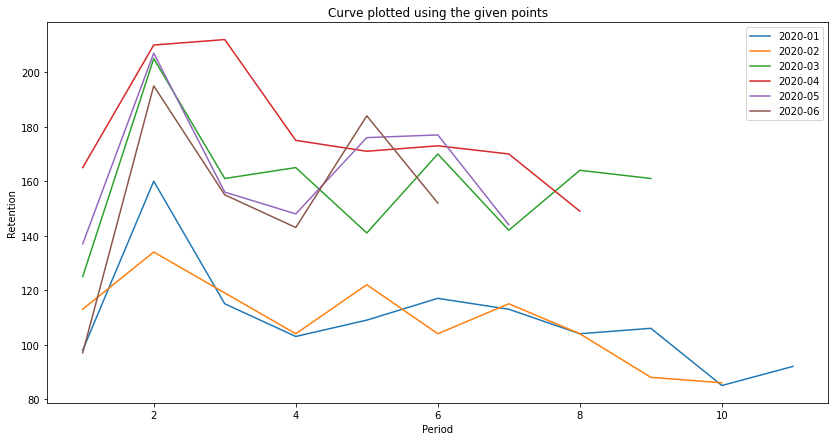

In [170]:
import numpy as np
import matplotlib.pyplot as plt

months = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06']

cohort = df_cohort['cohort']
n_customers = df_cohort['n_customers']
period_number = df_cohort['period_number']

month_prev = -1

for month in months:
        
    x = []
    y = []
    
    for idx, elem in enumerate(df_cohort['cohort']):
        
        if not (str(np.array(elem)) == month):
            continue
            
        n = int(df_cohort['n_customers'][idx])
        period = int(df_cohort['period_number'][idx])
        
        if period == 0:
            continue
        
        x.append(period)
        y.append(n)
        
            
    plt.plot(x, y, label=month)      
     
    
plt.title("Curve plotted using the given points")
plt.xlabel("Period")
plt.ylabel("Retention")
plt.legend()
plt.gcf().set_size_inches(14, 7)
plt.show()

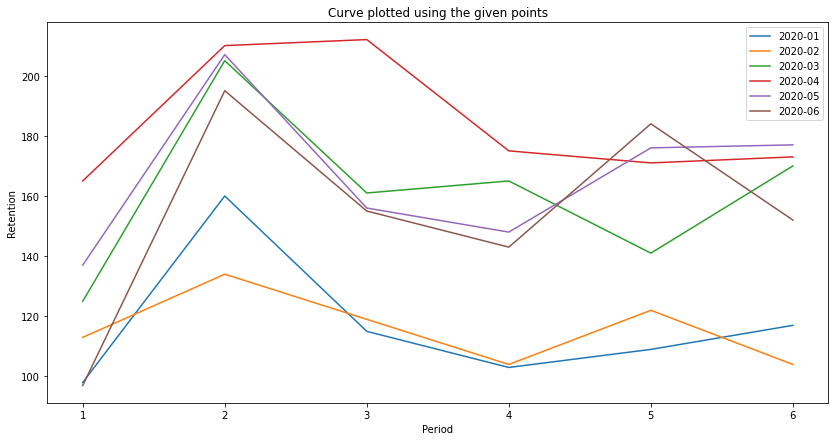

In [171]:
months = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06']

cohort = df_cohort['cohort']
n_customers = df_cohort['n_customers']
period_number = df_cohort['period_number']

month_prev = -1

for month in months:
        
    x = []
    y = []
    
    for idx, elem in enumerate(df_cohort['cohort']):
        
        if not (str(np.array(elem)) == month):
            continue
            
        n = int(df_cohort['n_customers'][idx])
        period = int(df_cohort['period_number'][idx])
        
        if period == 0 or period > 6:
            continue
        
        x.append(period)
        y.append(n)
        
            
    plt.plot(x, y, label=month)      
    
plt.title("Curve plotted using the given points")
plt.xlabel("Period")
plt.ylabel("Retention")
plt.legend()
plt.gcf().set_size_inches(14, 7)
plt.show()

In [172]:
cohort_size = cohort_pivot.iloc[:, 0]

In [173]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [174]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2020-01,1.0,0.027920,0.045584,0.032764,0.029345,0.031054,0.033333,0.032194,0.029630,0.030199,0.024217,0.026211
2020-02,1.0,0.031398,0.037233,0.033065,0.028897,0.033898,0.028897,0.031953,0.028897,0.024451,0.023896,NaN
2020-03,1.0,0.027027,0.044324,0.034811,0.035676,0.030486,0.036757,0.030703,0.035459,0.034811,NaN,NaN
2020-04,1.0,0.029157,0.037109,0.037462,0.030924,0.030217,0.030571,0.030041,0.026330,NaN,NaN,NaN
2020-05,1.0,0.025221,0.038108,0.028719,0.027246,0.032401,0.032585,0.026510,NaN,NaN,NaN,NaN
2020-06,1.0,0.020564,0.041340,0.032860,0.030316,0.039008,0.032224,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.023840,0.037342,0.040928,0.032068,0.029325,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1.0,0.023271,0.040395,0.036883,0.034248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,0.027525,0.041923,0.037264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


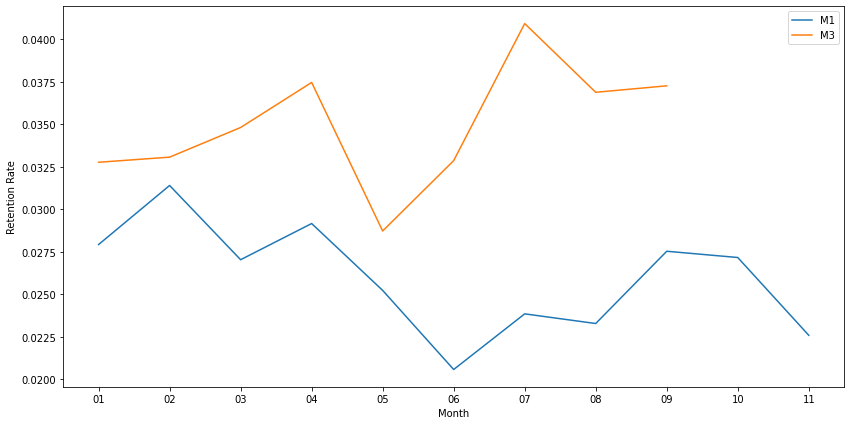

In [177]:
import numpy as np
import matplotlib.pyplot as plt

months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

M1 = np.array(retention_matrix[1])
M3 = np.array(retention_matrix[3])

plt.plot(months, M1, label='M1')      
plt.plot(months, M3, label='M3')  
plt.xlabel("Month")
plt.ylabel("Retention Rate")
plt.legend()
plt.gcf().set_size_inches(14, 7)
plt.show()

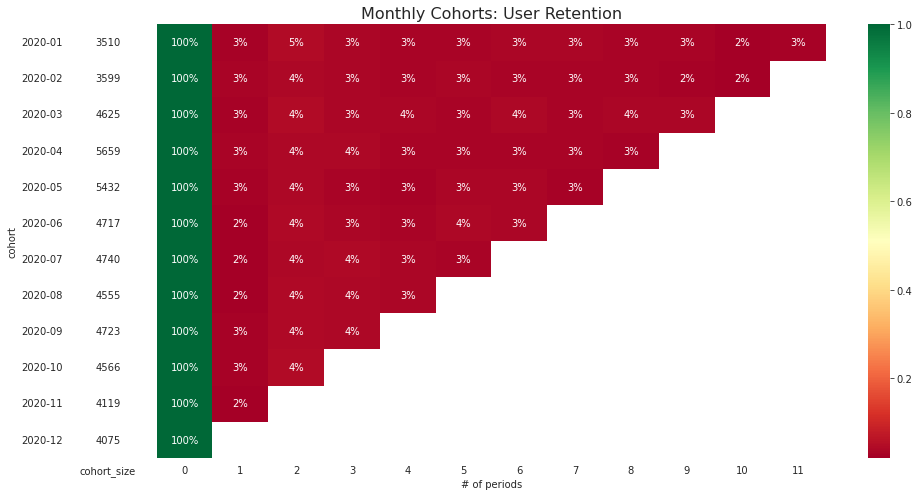

In [176]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()